# 🎓 Proyek Akhir: Menyelesaikan Permasalahan Jaya Jaya Institut

- Nama: Bima Rakajati
- Email: bimandugal@gmail.com
- Id Dicoding: https://www.dicoding.com/users/bimarakajati

Dataset ini akan digunakan untuk memprediksi apakah seorang mahasiswa akan `Dropout`, `Graduate`, atau masih `Enrolled`.

## 📦 Persiapan

Menyiapkan library yang dibutuhkan

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import joblib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## 📂 Data Understanding

Menyiapkan data yang akan digunakan

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv', delimiter=';', encoding='utf-8')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## 🔎 Exploratory Data Analysis (EDA)

`EDA (Exploratory Data Analysis)` adalah pendekatan untuk menganalisis kumpulan data untuk meringkas karakteristik utamanya, seringkali dengan metode visual, guna memahami pola, menemukan anomali, menguji hipotesis, dan mendapatkan wawasan awal tentang data sebelum melakukan pemodelan lebih lanjut.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [33]:
df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


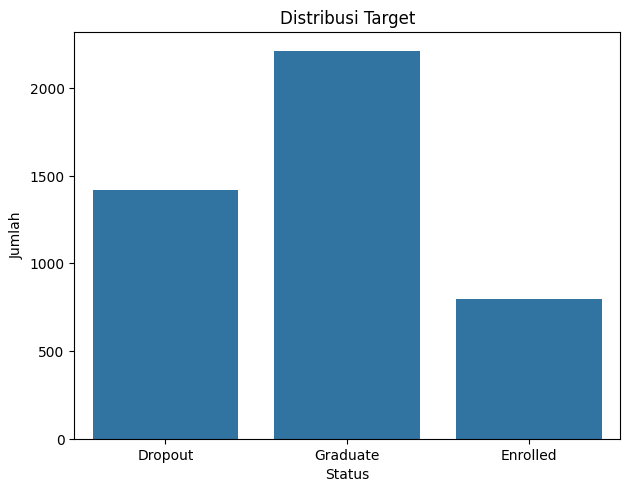

In [34]:
# Melihat distribusi target
sns.countplot(data=df, x='Status')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.title('Distribusi Target')
plt.show()

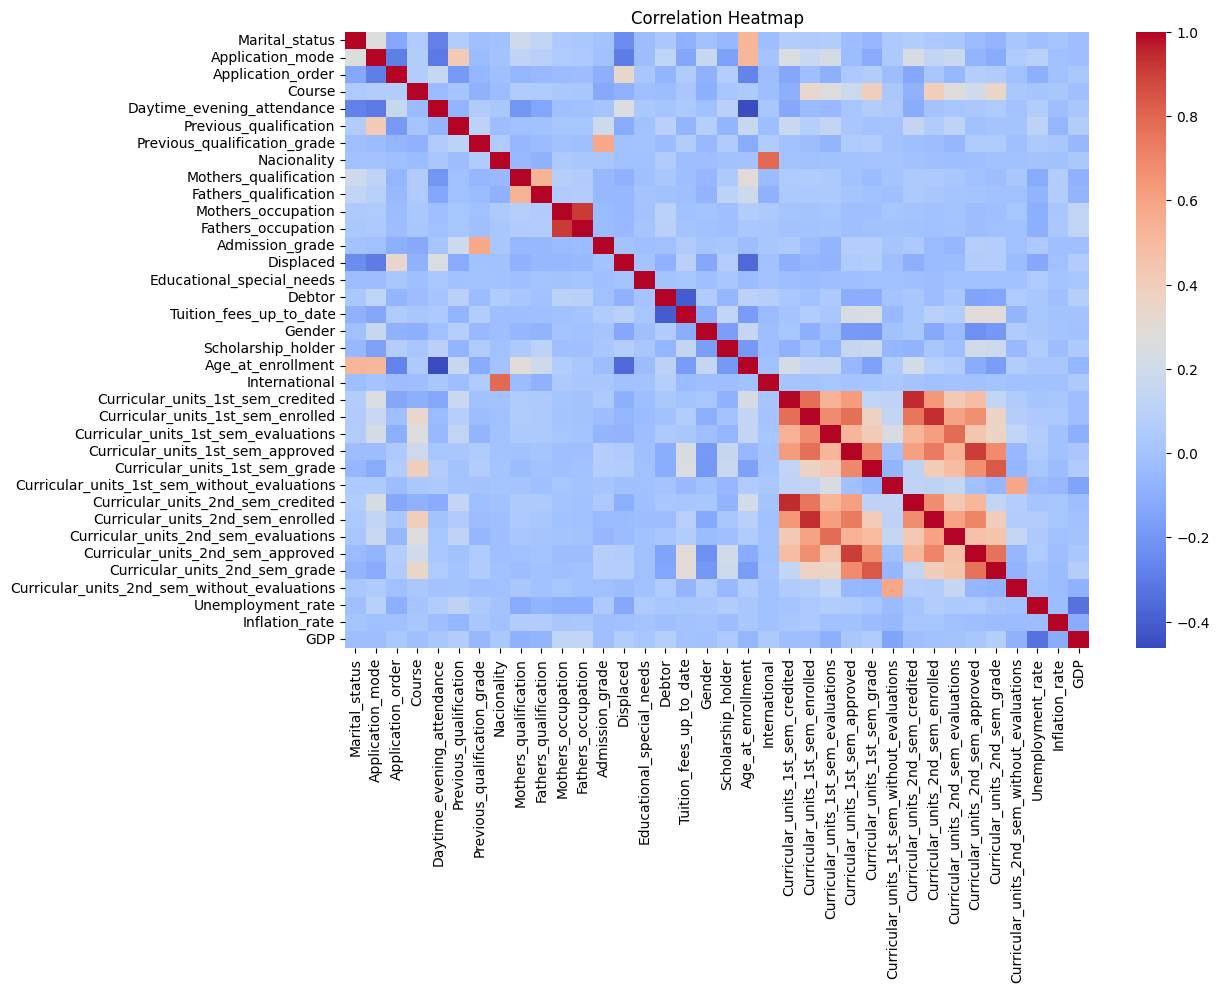

In [35]:
# Cek korelasi antar fitur numerik
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

## ⚙️ Data Preprocessing

In [36]:
# Encode target
le = LabelEncoder()
df['Target_encoded'] = le.fit_transform(df['Status'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}


Pada kode di atas, `LabelEncoder` digunakan untuk mengubah nilai-nilai non-numerik (kategori) pada kolom 'Status' menjadi nilai-nilai numerik.

**Mengapa Label Encoding Penting?**

Kebanyakan algoritma machine learning memerlukan input dalam bentuk numerik. Kolom 'Status' yang berisi teks ('Dropout', 'Graduate', 'Enrolled') tidak dapat langsung digunakan oleh model. *Label encoding* mengubah teks tersebut menjadi angka (0, 1, 2) sehingga dapat diproses oleh algoritma.

In [37]:
# Pisahkan fitur dan target
X = df.drop(columns=['Status', 'Target_encoded'])
y = df['Target_encoded']

In [38]:
# One-hot encoding untuk fitur kategorikal
X_encoded = pd.get_dummies(X, drop_first=True)

Kode di atas melakukan `one-hot encoding` pada fitur-fitur kategorikal dalam DataFrame X menggunakan fungsi pd.get_dummies, di mana setiap kolom kategorikal diubah menjadi beberapa kolom biner baru yang merepresentasikan setiap kategori uniknya.

In [39]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [40]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

`StandardScaler` adalah teknik preprocessing yang digunakan untuk menstandarisasi fitur dengan menghapus rata-rata dan menskalakan ke varian unit.

**Mengapa Scaling Penting?**

Scaling penting dilakukan pada dataset karena banyak algoritma machine learning, seperti regresi linear, SVM, dan K-Nearest Neighbors, sensitif terhadap skala fitur. fitur dengan rentang nilai yang lebih besar dapat mendominasi perhitungan jarak atau fungsi objektif, sehingga scaling, baik normalisasi atau standarisasi, membantu menyamakan kontribusi semua fitur dan mencegah bias, menghasilkan kinerja model yang lebih baik dan konvergen lebih cepat.

In [41]:
# One-hot encode target for LSTM
y_train_lstm = to_categorical(y_train)
y_test_lstm = to_categorical(y_test)

# Reshape input for LSTM: (samples, timesteps, features)
# Here, we treat each sample as a sequence of length 1
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

## 5. 🤖 Modeling

### Random Forest

In [42]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### Logistic Regression

In [43]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### K-Nearest Neighbors

In [44]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### Decision Tree

In [45]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

### Support Vector Machine

In [46]:
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

### Naive Bayes

In [47]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

In [48]:
# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(128, input_shape=(1, X_train_scaled.shape[1]), return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(64, return_sequences=False))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(y_train_lstm.shape[1], activation='softmax'))

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = lstm_model.fit(
    X_train_lstm, y_train_lstm,
    epochs=20,
    batch_size=16,
    validation_data=(X_test_lstm, y_test_lstm),
    verbose=1
)

Epoch 1/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.6442 - loss: 0.8778 - val_accuracy: 0.7503 - val_loss: 0.6227
Epoch 2/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7574 - loss: 0.5740 - val_accuracy: 0.7503 - val_loss: 0.6138
Epoch 3/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7794 - loss: 0.5435 - val_accuracy: 0.7559 - val_loss: 0.6101
Epoch 4/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7919 - loss: 0.5202 - val_accuracy: 0.7514 - val_loss: 0.6134
Epoch 5/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7963 - loss: 0.5130 - val_accuracy: 0.7605 - val_loss: 0.6028
Epoch 6/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8005 - loss: 0.4943 - val_accuracy: 0.7548 - val_loss: 0.6019
Epoch 7/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7988 - loss: 0.4941 - val_accuracy: 0.7593 - val_loss: 0.6100
Epoch 8/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8040 - loss: 0.4799 - val_accuracy:

## 6. 📈 Evaluation

=== Random Forest ===
              precision    recall  f1-score   support

     Dropout       0.85      0.77      0.81       316
    Enrolled       0.49      0.30      0.38       151
    Graduate       0.76      0.92      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.67      0.67       885
weighted avg       0.75      0.76      0.75       885



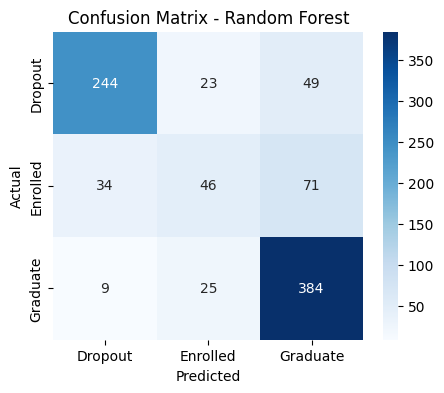

=== Logistic Regression ===
              precision    recall  f1-score   support

     Dropout       0.83      0.77      0.80       316
    Enrolled       0.45      0.28      0.34       151
    Graduate       0.76      0.91      0.83       418

    accuracy                           0.75       885
   macro avg       0.68      0.65      0.66       885
weighted avg       0.73      0.75      0.74       885



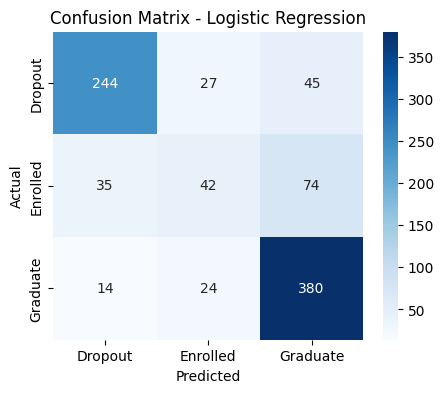

=== KNN ===
              precision    recall  f1-score   support

     Dropout       0.81      0.68      0.74       316
    Enrolled       0.37      0.28      0.32       151
    Graduate       0.72      0.87      0.79       418

    accuracy                           0.70       885
   macro avg       0.63      0.61      0.62       885
weighted avg       0.69      0.70      0.69       885



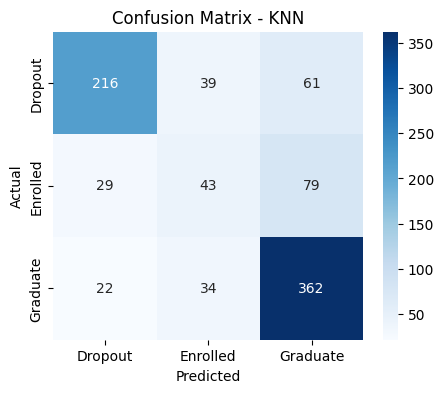

=== Decision Tree ===
              precision    recall  f1-score   support

     Dropout       0.72      0.64      0.68       316
    Enrolled       0.36      0.40      0.38       151
    Graduate       0.77      0.80      0.79       418

    accuracy                           0.68       885
   macro avg       0.62      0.61      0.61       885
weighted avg       0.68      0.68      0.68       885



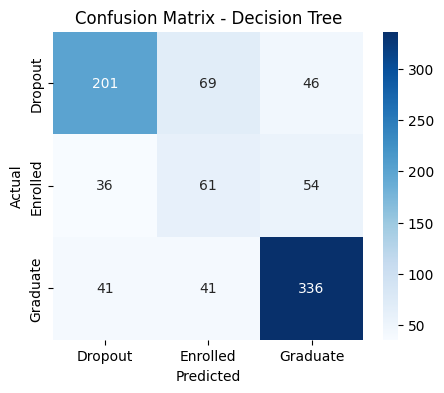

=== SVM ===
              precision    recall  f1-score   support

     Dropout       0.88      0.73      0.80       316
    Enrolled       0.48      0.32      0.38       151
    Graduate       0.75      0.94      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.75      0.76      0.74       885



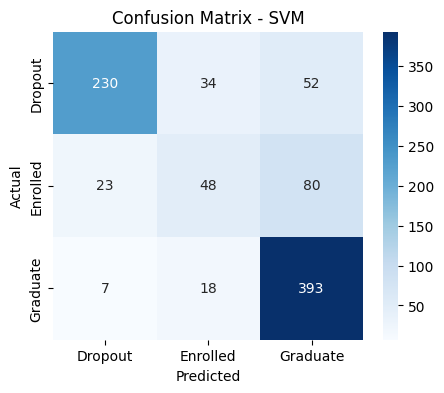

=== Naive Bayes ===
              precision    recall  f1-score   support

     Dropout       0.81      0.68      0.74       316
    Enrolled       0.36      0.25      0.29       151
    Graduate       0.70      0.86      0.77       418

    accuracy                           0.69       885
   macro avg       0.62      0.60      0.60       885
weighted avg       0.68      0.69      0.68       885



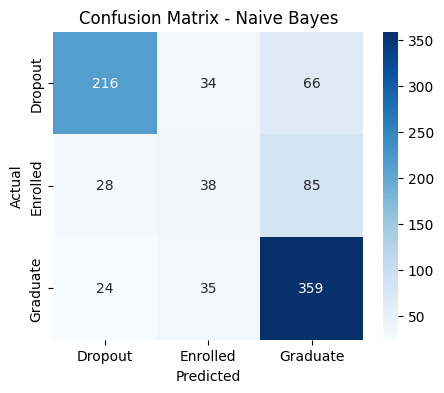

=== LSTM ===
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

     Dropout       0.84      0.76      0.80       316
    Enrolled       0.48      0.32      0.38       151
    Graduate       0.77      0.91      0.83       418

    accuracy                           0.76       885
   macro avg       0.69      0.66      0.67       885
weighted avg       0.74      0.76      0.74       885



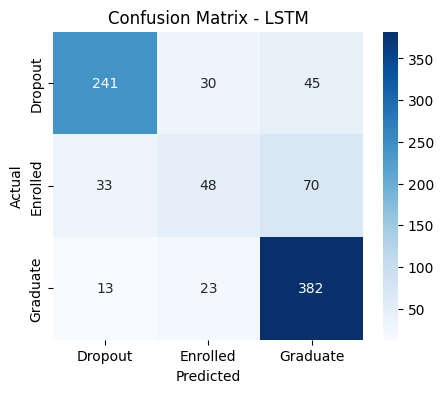

In [50]:
accuracy_dict = {}
models = {
    'Random Forest': rf_model,
    'Logistic Regression': lr_model,
    'KNN': knn_model,
    'Decision Tree': dt_model,
    'SVM': svm_model,
    'Naive Bayes': nb_model,
    'LSTM': lstm_model
}

for name, model in models.items():
    print(f"=== {name} ===")
    if name == 'LSTM':
        y_pred = model.predict(X_test_lstm)
        y_pred = np.argmax(y_pred, axis=1)
    else:
        y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracy_dict[name] = acc
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

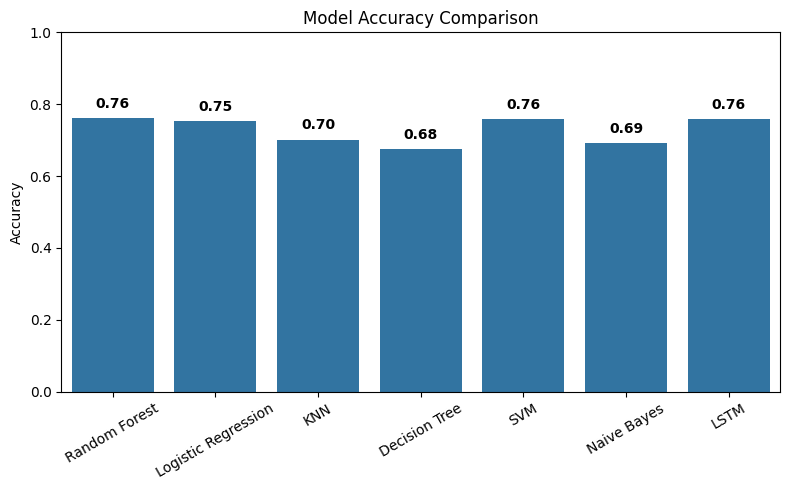

In [51]:
# Visualisasi bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=list(accuracy_dict.keys()), y=list(accuracy_dict.values()))
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=30)
for i, v in enumerate(accuracy_dict.values()):
    ax.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

## 7. 💾 Save Model dan Preprocessor

In [52]:
# Define the directory path
model_dir = 'model/'

# Check if the directory exists, if not, create it
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"Directory '{model_dir}' created.")

# Now save the models
joblib.dump(rf_model, os.path.join(model_dir, 'dropout_model.pkl'))
joblib.dump(scaler, os.path.join(model_dir, 'dropout_scaler.pkl'))
joblib.dump(X_encoded.columns.tolist(), os.path.join(model_dir, 'features_list.pkl'))
joblib.dump(le, os.path.join(model_dir, 'target_encoder.pkl'))

['model/target_encoder.pkl']